In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import json
from datetime import datetime

In [3]:
import math
c = float(3*(10**8))
f = 2.4*(10**9)

def friis(d, Pt=8, Gt=1, Gr=1, lambd=c/f):
    M = lambd / (4 * math.pi * d)
    Pr = Pt + Gt + Gr + 20*math.log(M,10)
    return Pr

In [5]:
df = pd.read_csv("../data/hr_neighbors.csv")

df_clean = df[(df.numRxPackets > 0) & (df.numTxPackets > 0) & (df.numTxFailures >= 0) 
              & (df.rssi<0) 
              & (df.distance<1000) & (df.distance>1)
             ]
df_clean.loc[:,"date"] = pd.to_datetime(df_clean.time,unit='s')
df_clean.set_index(df_clean["date"],inplace=True)

lines_removed = len(df) - len(df_clean)
print "total number of lines =", len(df)
print "number of lines removed = ", lines_removed, "(", float(lines_removed)*100/len(df), "% )"
print "Active links between ", df_clean.date[0], "and", df_clean.date[len(df_clean.date)-1]

df_clean.head()

total number of lines = 30197
number of lines removed =  18896 ( 62.5757525582 % )
Active links between  2016-11-02 15:05:40 and 2016-11-10 21:21:00


/home/keoma/.local/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/keoma/.local/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,time,mac,neighborMac,neighborFlag,rssi,numTxPackets,numTxFailures,numRxPackets,mote_board,ngbr_board,distance,date
date,,,,,,,,,,,,
2016-11-02 15:05:40,1478099140,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-68,67,8,1,huron,huron,13.9047,2016-11-02 15:05:40
2016-11-02 15:20:40,1478100040,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-69,74,10,2,huron,huron,13.9047,2016-11-02 15:20:40
2016-11-02 15:35:42,1478100942,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-72,76,12,2,huron,huron,13.9047,2016-11-02 15:35:42
2016-11-02 15:50:40,1478101840,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-70,70,8,1,huron,huron,13.9047,2016-11-02 15:50:40
2016-11-02 16:05:41,1478102741,00-17-0d-00-00-38-00-63,00-17-0d-00-00-58-eb-5b,0,-71,66,4,2,huron,huron,13.9047,2016-11-02 16:05:41


# RSSI vs Distance (Pister-Hack model)

### Removing non-DC9003 boards

In [6]:
df_reduced = df_clean

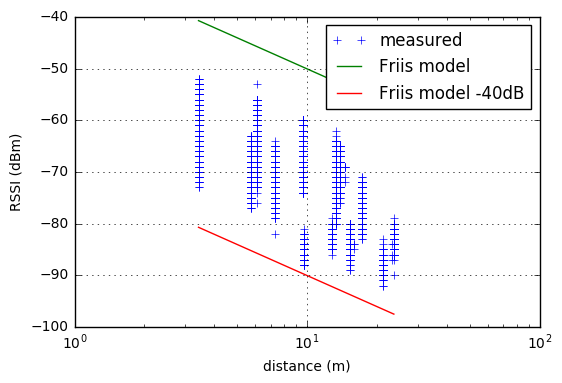

In [12]:
friss_line1_x = [df_reduced.distance.min(),df_reduced.distance.max()]
friss_line1_y = [friis(d) for d in [df_reduced.distance.min(),df_reduced.distance.max()]]
friss_line2_x = [df_reduced.distance.min(),df_reduced.distance.max()]
friss_line2_y = [friis(d)-40 for d in [df_reduced.distance.min(),df_reduced.distance.max()]]

#data = [go.Scattergl(x=df_reduced.distance, y=df_reduced.rssi,name="measured", mode='markers',marker=dict(symbol="cross")),
#        go.Scattergl(x=friss_line1_x, y=friss_line1_y,name="Friis model"),
#        go.Scattergl(x=friss_line2_x, y=friss_line2_y,name="Friis -40dB"),
#        ]

plt.plot(df_reduced.distance, df_reduced.rssi, '+', label="measured")
plt.plot(friss_line1_x, friss_line1_y, '-', label="Friis model")
plt.plot(friss_line2_x, friss_line2_y, '-', label="Friis model -40dB")

plt.xlabel('distance (m)')
plt.ylabel('RSSI (dBm)')
plt.legend()

plt.xscale('log')
plt.grid(True)

plt.show()
